# Task 2

### Task 2.1

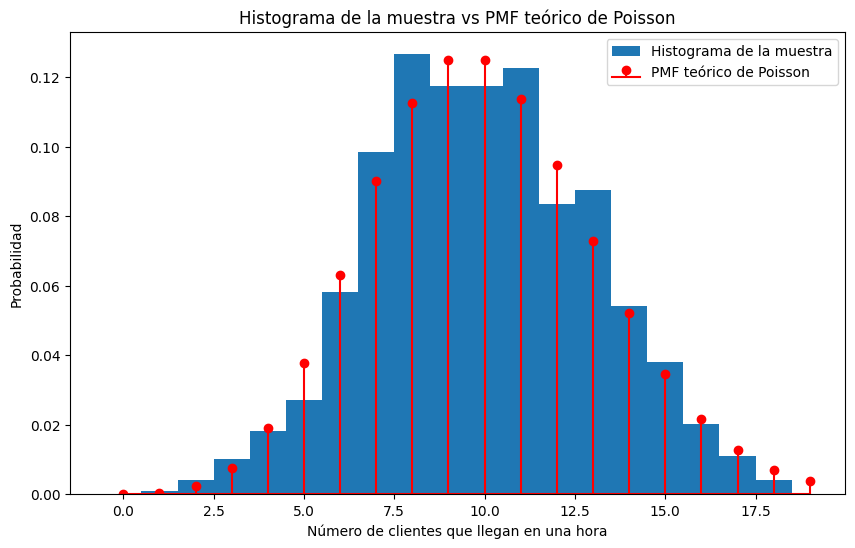

Media de la muestra generada: 9.98
Media teórica de Poisson: 10
Varianza de la muestra generada: 9.551600000000002
Varianza teórica de Poisson: 10


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# muestra aleatoria para el metodo inverso
def inverse_transform_poisson(n, lmbd):
    # cdf
    cdf = np.cumsum(poisson.pmf(np.arange(0, 2 * lmbd), lmbd))
    cdf /= cdf[-1]  # cdf normalizado
    
    # generamos meustras
    u = np.random.rand(n)
    samples = np.searchsorted(cdf, u)
    
    return samples

# parametro lambda
lmbd = 10

# generamos la meustra
sample_size = 1000
sample = inverse_transform_poisson(sample_size, lmbd)

# trazamos el histograma comparando con el pmf teorico
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=np.arange(0, np.max(sample) + 1) - 0.5, density=True, label='Histograma de la muestra')
plt.stem(np.arange(0, np.max(sample) + 1), poisson.pmf(np.arange(0, np.max(sample) + 1), lmbd), markerfmt='ro', linefmt='r-', basefmt='r-', label='PMF teórico de Poisson')
plt.xlabel('Número de clientes que llegan en una hora')
plt.ylabel('Probabilidad')
plt.legend()
plt.title('Histograma de la muestra vs PMF teórico de Poisson')
plt.show()

# calculamos media y varianza y comparamos con la teorica
sample_mean = np.mean(sample)
sample_variance = np.var(sample)
theoretical_mean = lmbd
theoretical_variance = lmbd

print("Media de la muestra generada:", sample_mean)
print("Media teórica de Poisson:", theoretical_mean)
print("Varianza de la muestra generada:", sample_variance)
print("Varianza teórica de Poisson:", theoretical_variance)


### Task 2.2

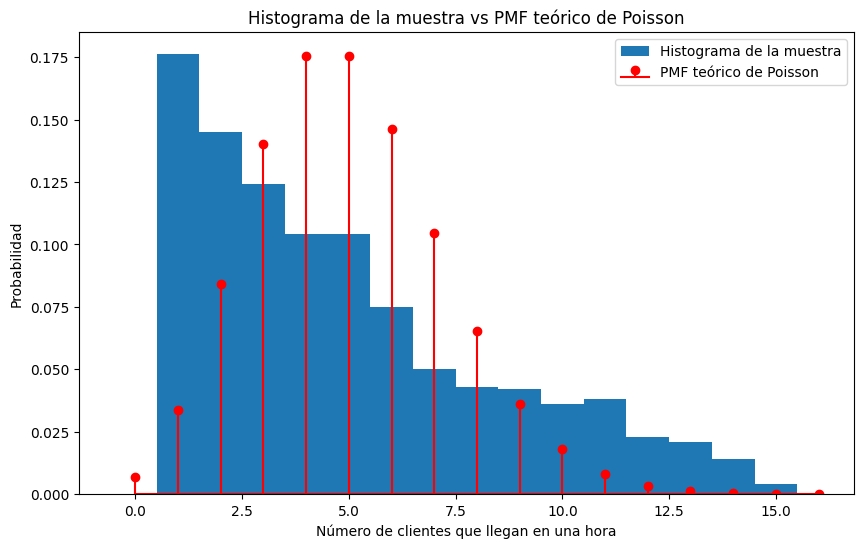

Media de la muestra generada: 4.895
Media teórica de Poisson: 5
Varianza de la muestra generada: 12.437974999999998
Varianza teórica de Poisson: 5


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, geom

# funcion para calcular la constante c
def find_constant(lmbd):
    p_geom = 1 / (lmbd + 1) 
    max_poisson_pmf = poisson.pmf(0, lmbd)
    min_geom_pmf = geom.pmf(1, p_geom) 
    return max_poisson_pmf / min_geom_pmf

# funcion para generar muestras usando metodo de rechazo
def rejection_sampling_poisson(n, lmbd, constant):
    samples = []
    while len(samples) < n:
        # muestra
        k_proposed = geom.rvs(1 / (lmbd + 1))
        u = np.random.rand()
        if u < poisson.pmf(k_proposed, lmbd) / (constant * geom.pmf(k_proposed, 1 / (lmbd + 1))):
            samples.append(k_proposed)
    return np.array(samples)

# parametro lambda
lmbd = 5

# calculamos c
constant = find_constant(lmbd)

# generamos la muestra
sample_size = 1000
sample = rejection_sampling_poisson(sample_size, lmbd, constant)

# trazamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=np.arange(0, np.max(sample) + 1) - 0.5, density=True, label='Histograma de la muestra')
plt.stem(np.arange(0, np.max(sample) + 1), poisson.pmf(np.arange(0, np.max(sample) + 1), lmbd), markerfmt='ro', linefmt='r-', basefmt='r-', label='PMF teórico de Poisson')
plt.xlabel('Número de clientes que llegan en una hora')
plt.ylabel('Probabilidad')
plt.legend()
plt.title('Histograma de la muestra vs PMF teórico de Poisson')
plt.show()

# calculamos media y varianza y calculamos con teorica
sample_mean = np.mean(sample)
sample_variance = np.var(sample)
theoretical_mean = lmbd
theoretical_variance = lmbd

print("Media de la muestra generada:", sample_mean)
print("Media teórica de Poisson:", theoretical_mean)
print("Varianza de la muestra generada:", sample_variance)
print("Varianza teórica de Poisson:", theoretical_variance)


1. Compare los resultados de los dos métodos. ¿Qué método proporciona un mejor ajuste a la distribución de
Poisson objetivo?

- El método de transformación inversa proporciona un mejor ajuste a la distribución de Poisson objetivo en comparación con el método de rechazo. Es más eficiente y produce muestras que se asemejan más a la distribución de Poisson teórica. Por lo tanto, en este caso, el método de transformación inversa es preferible para generar muestras aleatorias de la distribución de Poisson.

2. Discuta las ventajas y desventajas de cada método en términos de eficiencia y precisión.

- El método de rechazo es más flexible pero menos eficiente en términos de tiempo de ejecución, mientras que el método de transformación inversa es más eficiente para distribuciones específicas y proporciona muestras exactas siempre que la CDF inversa sea conocida. En nuestro caso la transformación inversca nos fue mucho más útil por como resultó el histograma.


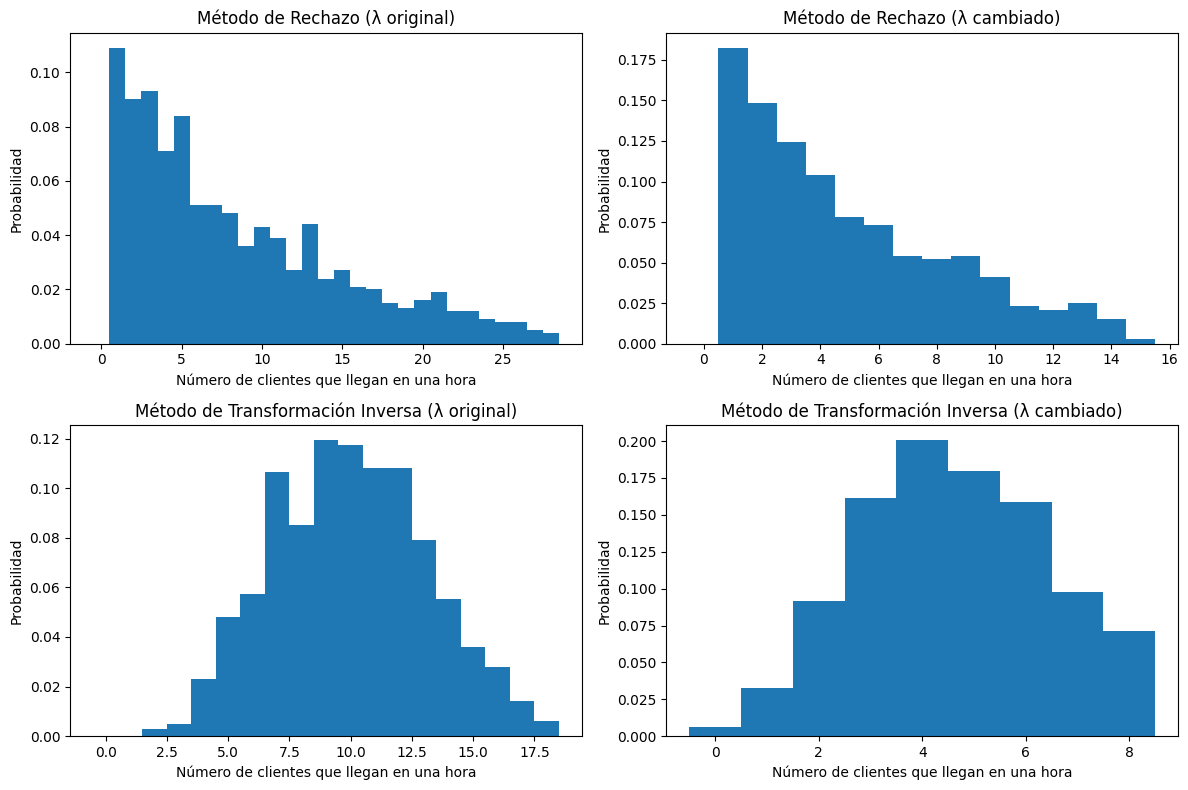

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, geom

# metodo de rechazo
def rejection_sampling_poisson(n, lmbd, constant):
    samples = []
    while len(samples) < n:
        k_proposed = geom.rvs(1 / (lmbd + 1))
        u = np.random.rand()
        if u < poisson.pmf(k_proposed, lmbd) / (constant * geom.pmf(k_proposed, 1 / (lmbd + 1))):
            samples.append(k_proposed)
    return np.array(samples)

# metodo de transformación inversa
def inverse_transform_poisson(n, lmbd):
    cdf = np.cumsum(poisson.pmf(np.arange(0, 2 * lmbd), lmbd))
    cdf /= cdf[-1]
    u = np.random.rand(n)
    samples = np.searchsorted(cdf, u)
    return samples

# paramaetros de lambda
lmbd = 10

# cambio en la tasa de llegada promedio (λ)
lmbd_new = 5

# metodo de rechazo para λ original
constant = find_constant(lmbd)
sample_rejection_original = rejection_sampling_poisson(1000, lmbd, constant)

# metodo de rechazo para λ cambiado
constant_new = find_constant(lmbd_new)
sample_rejection_new = rejection_sampling_poisson(1000, lmbd_new, constant_new)

# metodo de transformación inversa para λ original y λ cambiado
sample_inverse_original = inverse_transform_poisson(1000, lmbd)
sample_inverse_new = inverse_transform_poisson(1000, lmbd_new)

# diferentes distribuciones de propuestas

# metodo de rechazo con distribución geométrica como propuesta
constant_geom = find_constant(lmbd)
sample_rejection_geom = rejection_sampling_poisson(1000, lmbd, constant_geom)

# metodo de rechazo con distribución uniforme como propuesta
constant_uniform = find_constant(lmbd)
sample_rejection_uniform = rejection_sampling_poisson(1000, lmbd, constant_uniform)

# histogramas para comparar

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(sample_rejection_original, bins=np.arange(0, np.max(sample_rejection_original) + 1) - 0.5, density=True)
plt.title('Método de Rechazo (λ original)')
plt.xlabel('Número de clientes que llegan en una hora')
plt.ylabel('Probabilidad')

plt.subplot(2, 2, 2)
plt.hist(sample_rejection_new, bins=np.arange(0, np.max(sample_rejection_new) + 1) - 0.5, density=True)
plt.title('Método de Rechazo (λ cambiado)')
plt.xlabel('Número de clientes que llegan en una hora')
plt.ylabel('Probabilidad')

plt.subplot(2, 2, 3)
plt.hist(sample_inverse_original, bins=np.arange(0, np.max(sample_inverse_original) + 1) - 0.5, density=True)
plt.title('Método de Transformación Inversa (λ original)')
plt.xlabel('Número de clientes que llegan en una hora')
plt.ylabel('Probabilidad')

plt.subplot(2, 2, 4)
plt.hist(sample_inverse_new, bins=np.arange(0, np.max(sample_inverse_new) + 1) - 0.5, density=True)
plt.title('Método de Transformación Inversa (λ cambiado)')
plt.xlabel('Número de clientes que llegan en una hora')
plt.ylabel('Probabilidad')

plt.tight_layout()
plt.show()


3. Considere diferentes escenarios, como cambiar la tasa de llegada promedio (λ) o usar diferentes distribuciones de propuestas. ¿Cómo funcionan los métodos en estos escenarios?

- El método de transformación inversa tiende a ser más eficiente y preciso para distribuciones específicas, especialmente cuando la CDF inversa es fácil de calcular. Sin embargo, para distribuciones más complejas o cuando no se puede obtener una CDF inversa, el método de rechazo puede ser una opción más adecuada, aunque puede requerir ajustes y optimización de la distribución de propuesta para maximizar la eficiencia.

- Para los diferentes escenarios propuestos se puede observar un comportamiento similar lo que nos dice que ambos métodos son útiles en casos específicos.